<a href="https://colab.research.google.com/github/Cindy12MYG/PUC/blob/main/Test_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXAMEN CURSO IMAGE PROCESSING - PUC EEIGM October 2024 (20min)
Test 2 |
**Christian Mata**

Puedes utilizar los materiales del curso durante el examen.
Por favor, utiliza este cuaderno de Python para completar las siguientes preguntas:

# Image processing

  1. Lee una imagen en color y muestra el histograma original. Aplica ruido a la imagen y muestra el histograma. Compara ambos resultados. (Intenta mostrar una figura con dos imágenes).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import skimage as sk # load skimage libraries
from skimage import io
file_path = '/content/drive/MyDrive/Images/dog_image.jpg'
I = sk.io.imread(file_path) # read image using imread function
I.shape # 3 matrices : color

(300, 300, 3)

In [ ]:
IG = sk.color.rgb2gray(I)
IG.shape # 1 matriz : gris

(1200, 921)

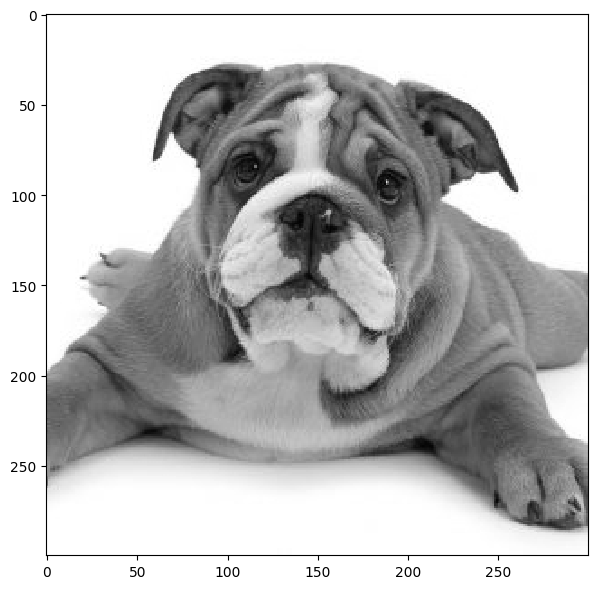

In [ ]:
fig = plt.figure(figsize=(10,6))
sk.io.imshow(IG) # visualize image using imshow function
sk.io.show()

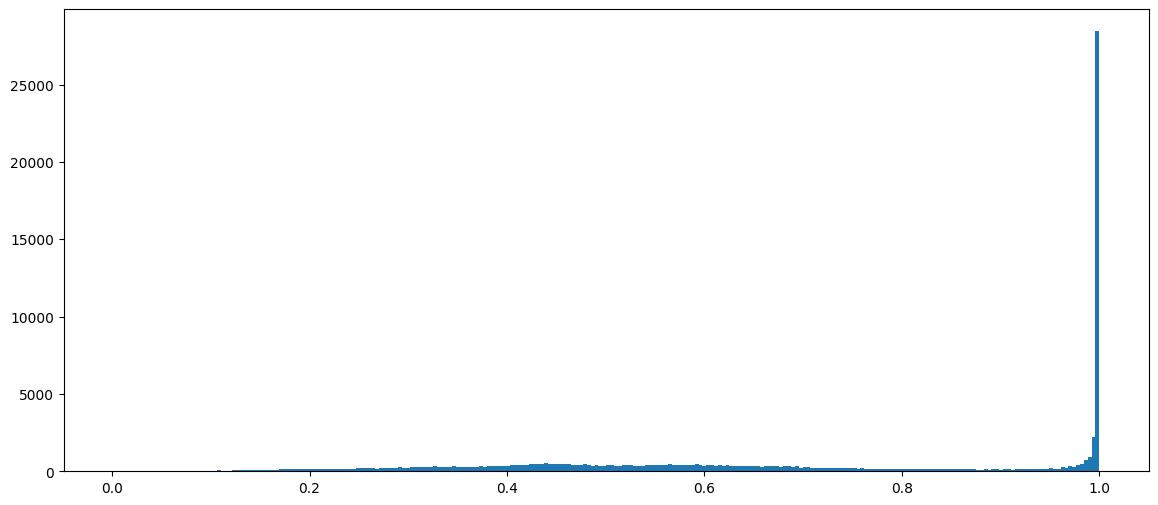

In [ ]:
import matplotlib.pyplot as plt
# reshape the uint8 image as 1d array: (= un vecteur)
v = IG.reshape(IG.shape[0]*IG.shape[1],1)

fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False) # 256 = nbr de rectangles, le max de valeurs qu'il prend
plt.show()

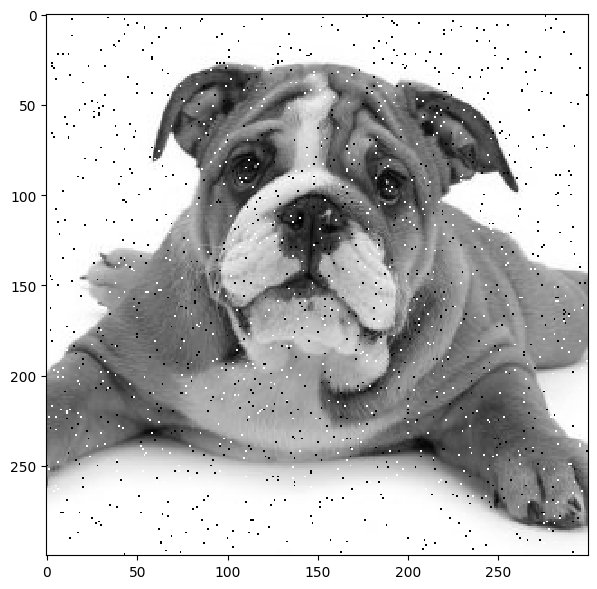

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage import img_as_ubyte

img = IG

## Noisy image: Add some noise by randomly setting some pixels to 0 or 255 (salt and pepper noise)
noise = np.random.random(img.shape) # uniform random numbers between 0 and 1
noisy_image = img_as_ubyte(IG)
noisy_image[noise > 0.99] = 255
noisy_image[noise < 0.01] = 0


fig = plt.figure(figsize=(10,6))
sk.io.imshow(noisy_image) # visualize image using imshow function
sk.io.show()


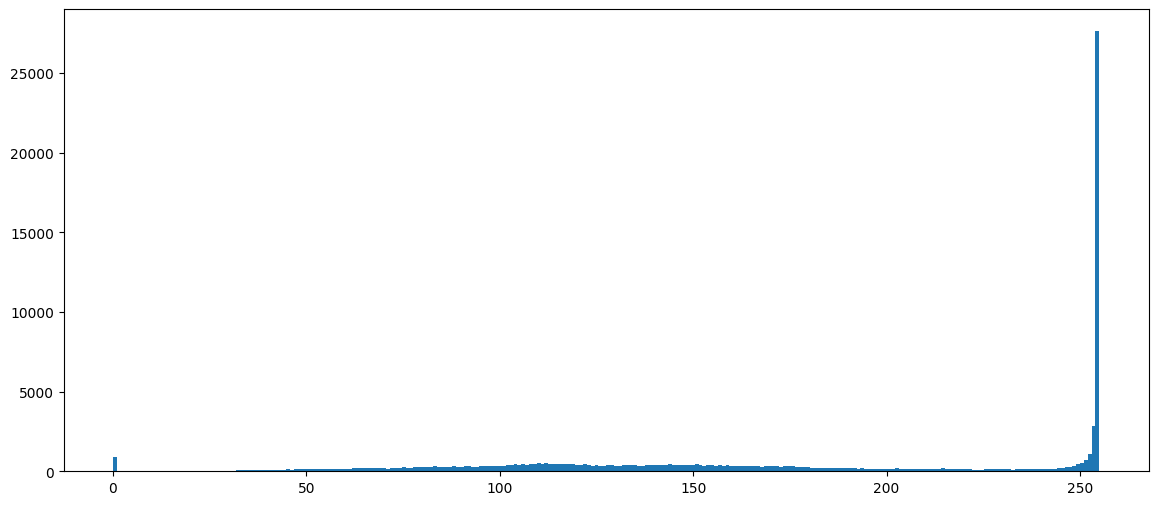

In [ ]:
import matplotlib.pyplot as plt
# reshape the uint8 image as 1d array: (= un vecteur)
noisy_v = noisy_image.reshape(noisy_image.shape[0]*noisy_image.shape[1],1)

fig = plt.figure(figsize=(14, 6))
plt.hist(noisy_v, bins=256,density=False) # 256 = nbr de rectangles, le max de valeurs qu'il prend
plt.show()

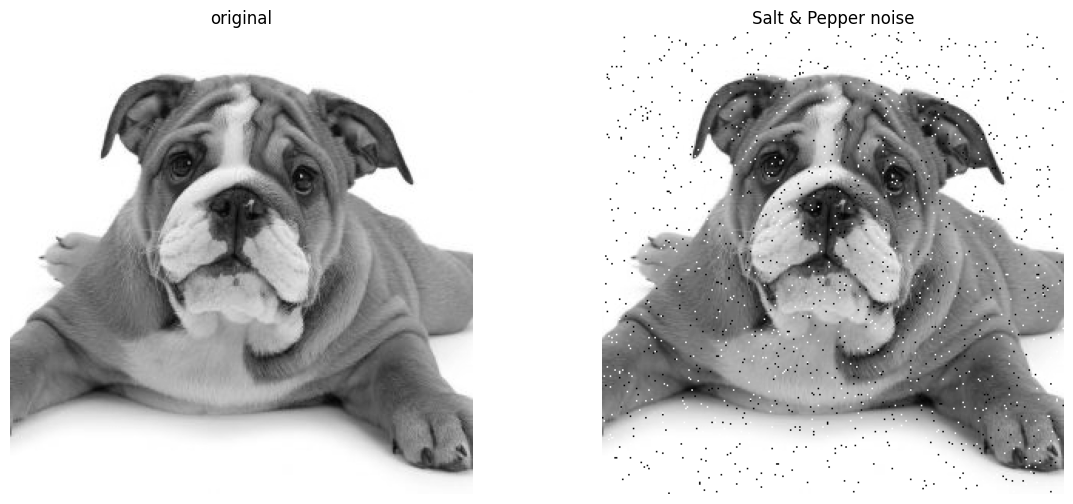

In [ ]:
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

plot_comparison(img,noisy_image,'Salt & Pepper noise')

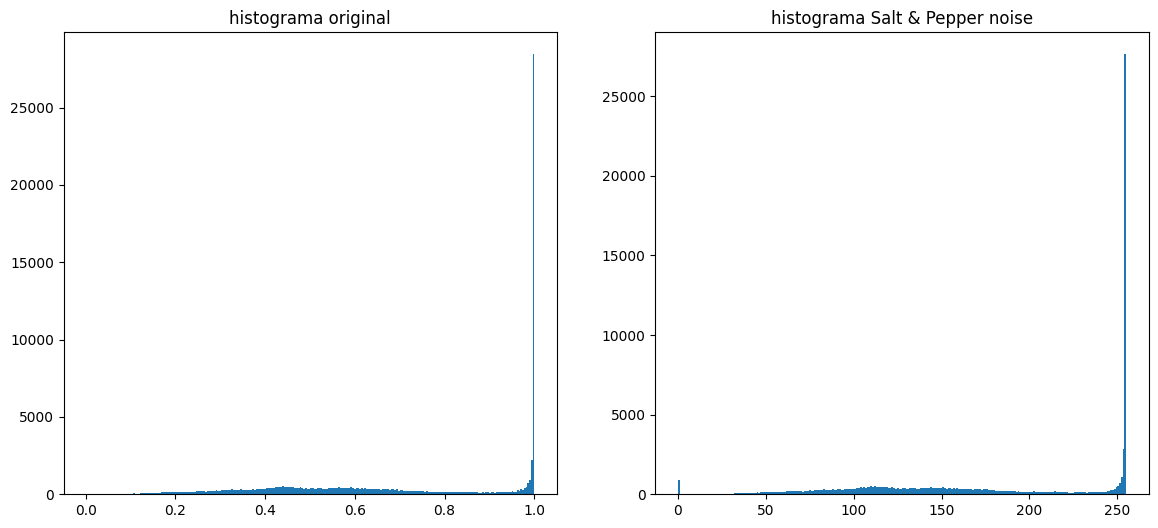

In [ ]:
fig = plt.figure(figsize=(14, 6))
plt.subplot(121) # 1 ligne 2 colonne, image 1
plt.hist(v, bins=256,density=False) # 256 = nbr de rectangles, le max de valeurs qu'il prend
plt.title('histograma original')

plt.subplot(122) # 1 ligne 2 colonne, image 2
plt.hist(noisy_v, bins=256,density=False) # 256 = nbr de rectangles, le max de valeurs qu'il prend
plt.title('histograma Salt & Pepper noise')
plt.show()

2. Ahora, ¿cómo podemos eliminar el ruido? Intenta utilizar diferentes filtros para corregir la imagen y muestra los resultados.

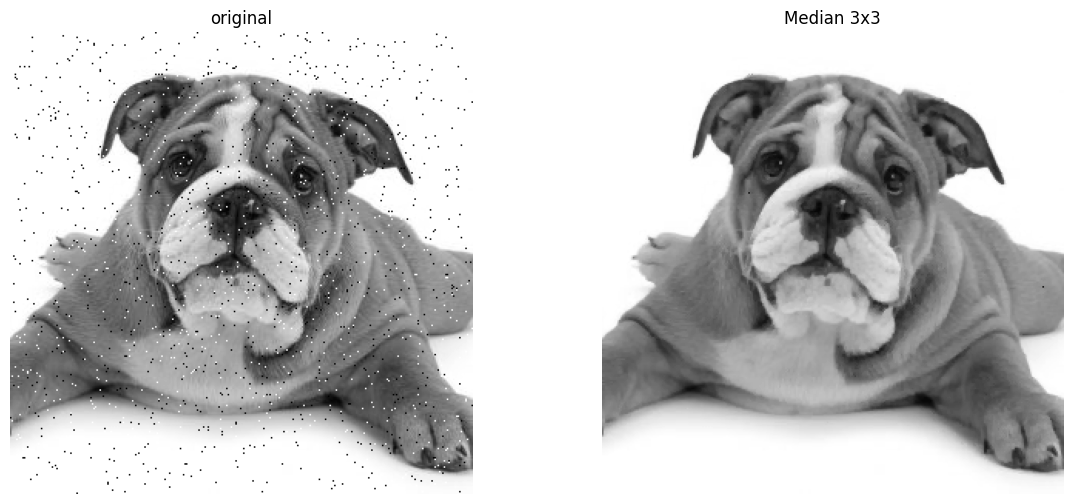

In [ ]:
from skimage.morphology import disk
from skimage.filters import median

img = img_as_ubyte(noisy_image)
sel3 = disk(1) # structuring element disk radius 3 pixels
img_med3x3 = median(img, sel3)
plot_comparison(img,img_med3x3,'Median 3x3')

3. Segmentación no supervisada de una imagen en color: Descarga una imagen en color RGB, conviértela a escala de grises y aplica un algoritmo de k-means para segmentar las diferentes estructuras.

In [ ]:
import skimage as sk # load skimage libraries
from skimage import io
file_path = '/content/drive/MyDrive/Images/vangogh.jpg'
I = sk.io.imread(file_path) # read image using imread function
I.shape # 3 matrices : color

(1200, 921, 3)

In [ ]:
IG = sk.color.rgb2gray(I)
IG.shape # 1 matriz : gris

(1200, 921)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


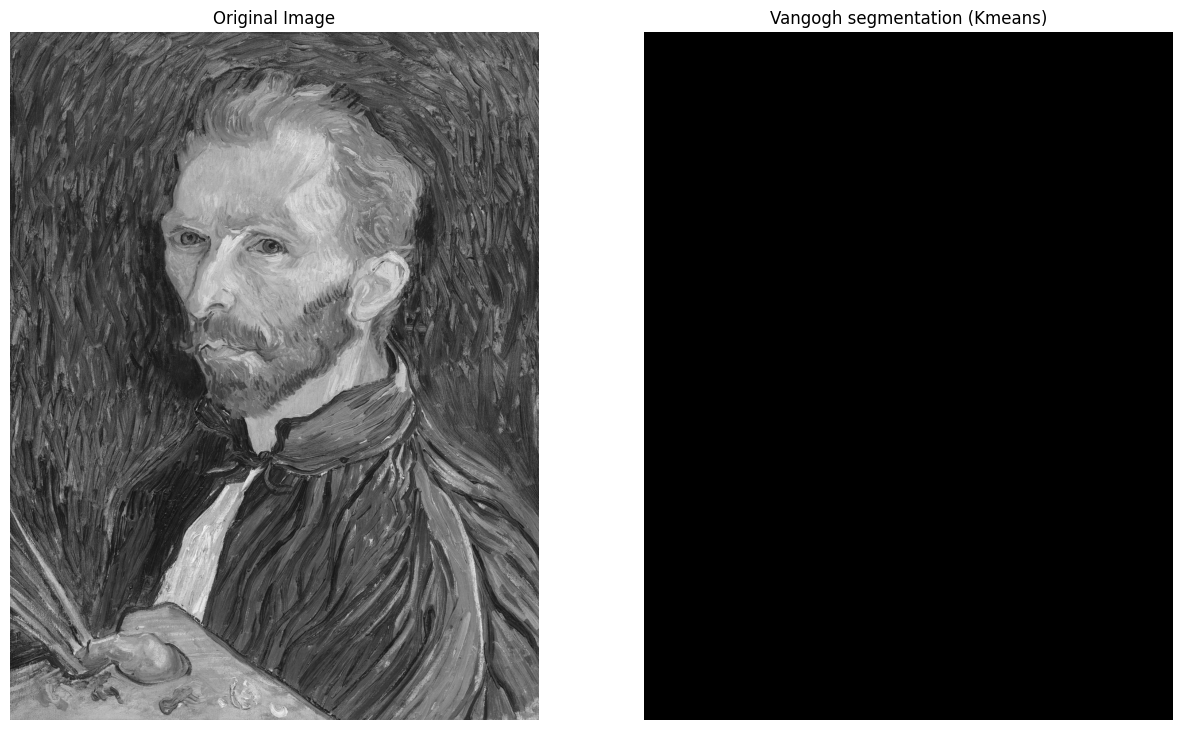

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import gridspec

# reshape training image as 1d array:
v_I_train = IG.reshape(IG.shape[0]*IG.shape[1],1).astype(np.uint8)

# Fit a Kmeans clustering model with two clusters using training image:
kmeans = KMeans(n_clusters=8, random_state=0).fit(v_I_train)
# changer nbr de clusters : nbr de nuances de gris

# Apply to predict test image:
v_I_test = IG.reshape(IG.shape[0]*IG.shape[1],1).astype(np.uint8) # reshape image as 1d array

v_kmeans = kmeans.predict(v_I_test)
#v_kmeans= np.logical_not(v_kmeans) # use when the pattern is associated to cluster 0 (vessels shoyld be white)
I_kmeans = np.array(v_kmeans).reshape(IG.shape[0],IG.shape[1]).astype(np.uint8) # Shape back result as image

fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(IG, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_kmeans, cmap=plt.cm.gray)
ax2.set_title('Vangogh segmentation (Kmeans)')
ax2.set_axis_off()

plt.show()

4. De la imagen segmentada anterior aplica las técnicas necesarias para obtener propiedades de textura y entropía.

In [ ]:
import numpy as np
from skimage.feature import graycomatrix, graycoprops # GLMC

# Crear la imagen de ejemplo
image = np.array([[0, 0, 1, 1],
                  [0, 0, 1, 1],
                  [0, 2, 2, 2],
                  [2, 2, 3, 3]], dtype=np.uint8)

# Calcular la matriz de co-ocurrencia en niveles de gris
g = graycomatrix(image, [1], [0], levels=4, normed=False, symmetric=False)

# Imprimir la imagen origina
print("Imagen:")
print(image)

Imagen:
[[0 0 1 1]
 [0 0 1 1]
 [0 2 2 2]
 [2 2 3 3]]


In [ ]:
import matplotlib.pyplot as plt
from skimage.measure import regionprops
import math
from skimage.feature import graycomatrix, graycoprops
from skimage import data
from skimage.measure import label, regionprops
from skimage.color import label2rgb

label_image = label(I_kmeans)

props = regionprops(label_image,intensity_image=IG) # Obain again the properties after removal of spourious regions

nregions = len(props)

iregion = 0
props_texture = np.zeros((nregions,5))
for p in props:
    minr, minc, maxr, maxc = p.bbox
    I = IG[minc:maxc,minr:maxr]
    g = graycomatrix(I, [1], [0], levels=None, normed=True, symmetric=True)
    contrast = graycoprops(g, 'contrast')
    dissimilarity = graycoprops(g, 'dissimilarity')
    homogeneity = graycoprops(g, 'homogeneity')
    energy = graycoprops(g, 'energy')
    correlation = graycoprops(g, 'correlation')

    props_texture[iregion,0] = contrast
    props_texture[iregion,1] = dissimilarity
    props_texture[iregion,2] = homogeneity
    props_texture[iregion,3] = energy
    props_texture[iregion,4] = correlation

    iregion = iregion + 1

# Export all features as a Pandas dataframe:
import pandas as pd
df = pd.DataFrame(props_texture,columns=['Contrast', 'dissimilarity','homogeneity','energy','correlation'])
df.to_excel("Texture_features.xlsx")
df

,Contrast,dissimilarity,homogeneity,energy,correlation


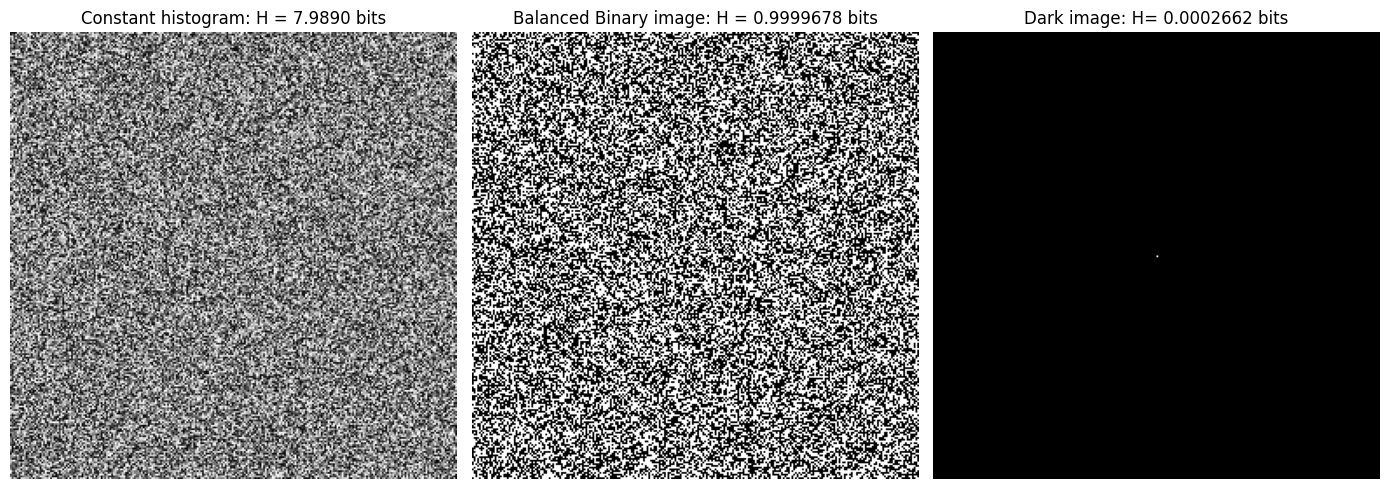

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Image with constant histogram:
I1 = np.random.randint(256,size=(256,256))

# Obtain probability of ocurrence of each grayscale level from image histogram:
v = I1.flatten() # Flatten image as row vector:
probg,edges = np.histogram(v,bins=np.arange(256), density=True)
eps = 1e-16
# Compute Shannon's entropy:
probg = probg + eps
H1 = -np.sum(probg * np.log2(probg), axis=0)

# 2. Binary image with half of the pixels 0 and half 1:
I2 = np.random.randint(2,size=(256,256))

# Obtain probability of ocurrence of each grayscale level from image histogram:
v = I2.flatten() # Flatten image as row vector:
probg,edges = np.histogram(v,bins=np.arange(256), density=True)
eps = 1e-16
# Compute Shannon's entropy:
probg = probg + eps
H2 = -np.sum(probg * np.log2(probg), axis=0)

# 3. Binary image with half of the pixels 0 and half 1:
I3 = np.zeros((256,256))
I3[128,128]=1
# Obtain probability of ocurrence of each grayscale level from image histogram:
v = I3.flatten() # Flatten image as row vector:
probg,edges = np.histogram(v,bins=np.arange(256), density=True)
eps = 1e-16
# Compute Shannon's entropy:
probg = probg + eps
H3 = -np.sum(probg * np.log2(probg), axis=0)

fig, axes = plt.subplots(1,3,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(I1,cmap=plt.cm.gray)
ax[0].set_title('Constant histogram: H = {0:1.4f} bits'.format(H1))
ax[1].imshow(I2,cmap=plt.cm.gray)
ax[1].set_title('Balanced Binary image: H = {0:1.7f} bits'.format(H2))
ax[2].imshow(I3,cmap=plt.cm.gray)
ax[2].set_title('Dark image: H= {0:1.7f} bits'.format(H3))

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

iregion = 0
entropy = np.zeros(nregions)
for p in props:
    minr, minc, maxr, maxc = p.bbox
    I = IG[minc:maxc,minr:maxr]
    v = I.flatten() # Flatten image as row vector:
    # Probability of ocurrence of each grayscale level
    probg,edges = np.histogram(v,bins=np.arange(256), density=True)
    eps = 1e-16
    probg = probg + eps
    H = -np.sum(probg * np.log2(probg), axis=0) # Compute Shannon's entropy
    entropy[iregion] = H
    iregion = iregion + 1

print('Entropy of the objects: {}'.format(entropy))

Entropy of the objects: []


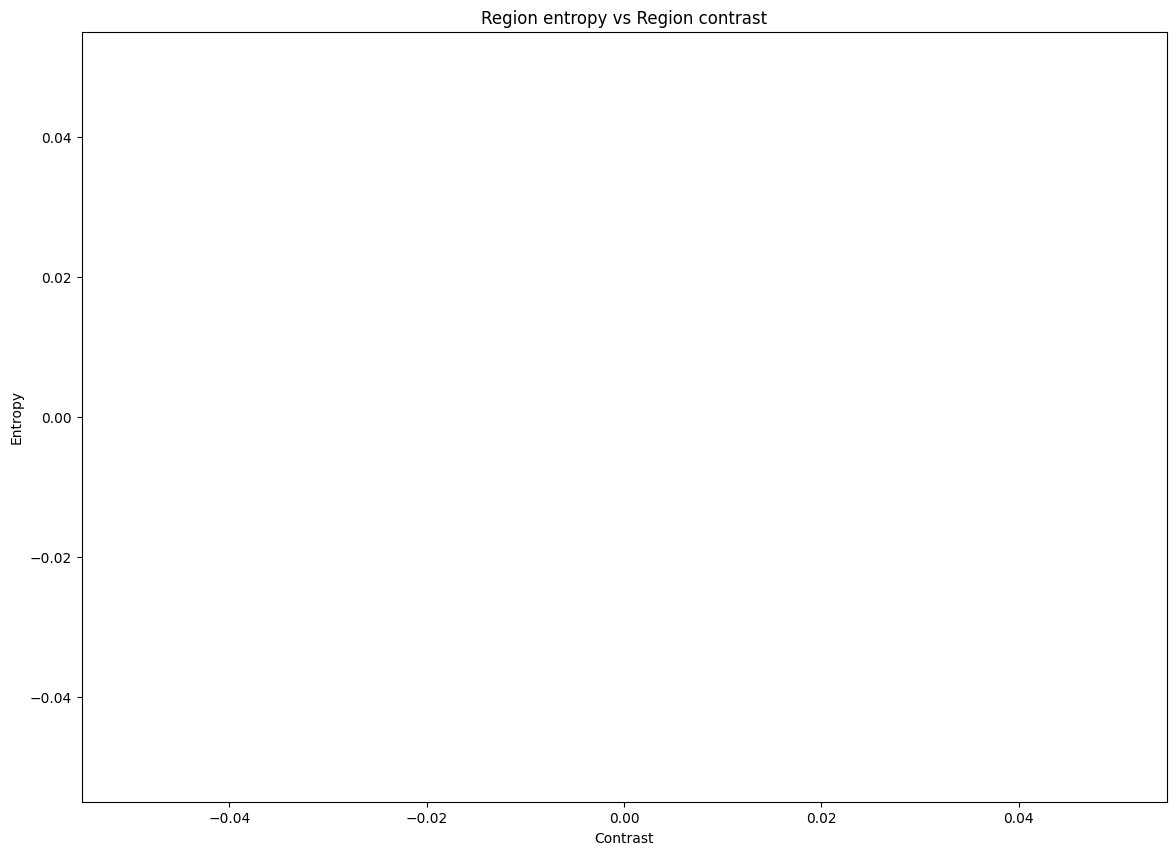

In [ ]:
fig = plt.figure(figsize=(14, 10))
plt.scatter(props_texture[:,0], entropy)
plt.ylabel('Entropy')
plt.xlabel('Contrast')
plt.title("Region entropy vs Region contrast")
plt.show()

5. Explica brevemente porque la extracción de características de una imagen puede ser útil para el estudio de materiales?

La extracción de características de una imagen puede ser útil en el campo de los materiales para detectar defectos mediante análisis no destructivos. Lo cual es un punto importante.